<a href="https://colab.research.google.com/github/Jefferson-Luis/Data-Science-com-Python/blob/main/Data_Science_com_Python_Modulo3_Aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtenção e Armazenamento de Dados 
### Módulo 3 - Aula 1: Filtro de dados


O Objetivo deste módulo é dar início ao processo de transformação e processamento de dados , para deixar no formato que precisamos antes de realizar a análise. Além disso, mostraremos como filtrar, modificar e juntar diferentes tipos de dados.




# 1.   Bibliotecas


Dando continuidade ao que aprendemos no módulo anterior, neste módulo continuaremos explorando todo o potencial da biblioteca pandas. Esta é a biblioteca de referência que devemos usar quando há necessidade de processamento e tratamento de dados. Além disso, vamos mostrar alguns procedimentos que podemos realizar com dados, utilizando para isso dados financeiros como exemplo.





In [166]:
# Execute apenas se for preciso instalar as bibliotecas

!pip install datetime
!pip install matplotlib plotly
!pip install yfinance quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Importação de dados financeiros
import yfinance as yf
import quandl


# 2. Cria e organizar  um datafram

## 2.1 Dataframe simples, uma coluna

Vamos utilizar a API da quandl(Nasdaq) que já vimos anteriormente para fazer a extração dos dados da Selic.

In [168]:
# Aqui você deve inserir sua senha de acesso da API

quandl.ApiConfig.api_key = "GT-6pdjTWZpWiaDuz-ma"

In [169]:
# Os códigos referentes a cada papel / moeda / taxa de juros podem ser obtidos na busca do proprio site da Quandl
# Nesse caso, a selic é representada por BCB/432

quandl.get("BCB/432")

,Value
Date,
1999-03-05,45.00
1999-03-06,45.00
1999-03-07,45.00
1999-03-08,45.00
1999-03-09,45.00
...,...
2022-05-21,12.75
2022-05-22,12.75
2022-05-23,12.75


In [170]:
# Efetuando alguns filtro para facilitar pois temos 8481 linha

selic = quandl.get('BCB/432', start_date = '2000-01-01', end_date = '2022-12-31')

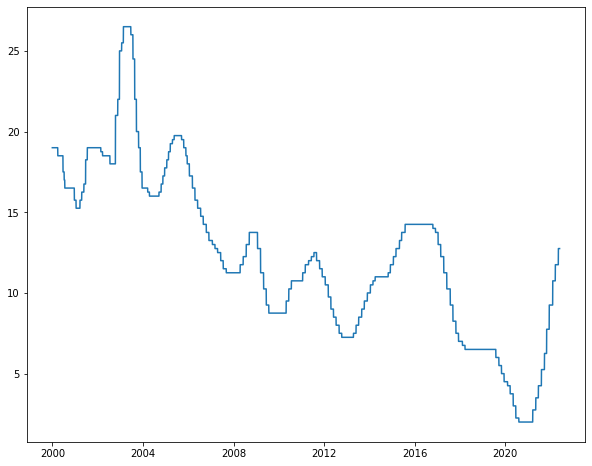

In [171]:
# plt.figure()   padrão 
plt.figure(figsize=(10,8))
plt.plot(selic)
plt.show()

In [172]:
# Inspecionar o formato dos dados

selic.head()

,Value
Date,
2000-01-01,19.0
2000-01-02,19.0
2000-01-03,19.0
2000-01-04,19.0
2000-01-05,19.0


Observe a estrutura do data frame acima. Perceba que ele possui apenas uma coluna e um índice(data). Data Frames assim são fáceis de trabalhar, pois as tarefas realizadas nele são automaticamente aplicadas a sua única coluna, portanto não é necessário mencionar o nome desta única coluna.

Os dataframes lembram muito os nossos conhecidos arquivos de planilha como Excel ou Google Sheets

## 2.2. Filtros simples

Imagine que você trabalha num banco e agora lhe foi dada a tarefa de selecionar um valor de Selic para um dia específico. Como você poderia fazer?
 

---


É para resolver problemas assim que existem os métodos .loc e .iloc. Como eles funcionam?


---


 A ideia desses métodos é de possibilitar um filtro no nosso dados para obter uma linha de célula específicas.

O método .loc

O .loc é utilizado quando o filtro deve ser feito com a métrica utilizada no índice do nosso dataframe.
Por exemplo, a métrica utilizada como índice no nosso dataframe é data. Portanto, nesse caso devemos usar o .loc com a data que queremos fazer o filtro.
Imagine que o seu gestor te perguntou qual era o valor da Selic no dia 26/05/21.

Você poderia ter feito assim:

In [173]:
selic_filtrada = selic.loc['2021-5-26']

In [174]:
selic_filtrada

Value    3.5
Name: 2021-05-26 00:00:00, dtype: float64

In [175]:
# Para obter os dados entre duas datas específicas

selic_filtrada = selic.loc['2019-03-26':'2021-05-26']
selic_filtrada

,Value
Date,
2019-03-26,6.5
2019-03-27,6.5
2019-03-28,6.5
2019-03-29,6.5
2019-03-30,6.5
...,...
2021-05-22,3.5
2021-05-23,3.5
2021-05-24,3.5


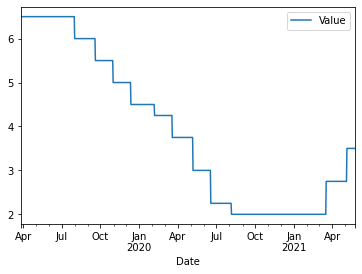

In [176]:
selic_filtrada.plot()

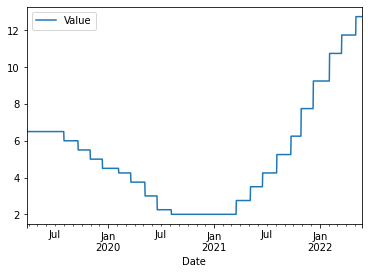

In [177]:
# Filtrando a partir de uma data específica e indo até o último dia disponível

selic_filtrada = selic.loc['2019-03-26':]
selic_filtrada.plot()

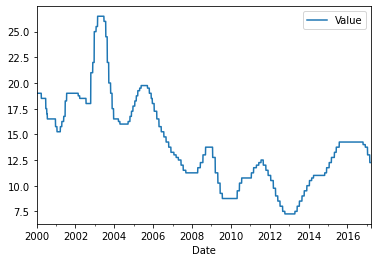

In [178]:
# Obtendo os dados desde o início e indo até uma data limite específica, nesse caso 26/03/2017

selic_filtrada = selic.loc [:'2017-03-26']
selic_filtrada.plot()

O método .iloc

O .iloc é utilizado quando o filtro deve ser feito com a posição da linha dentro do nosso dataframe.

Por exemplo, caso você precise da linha 0 ou linha 1. Ou mesmo se precisar da linha 200 até a linha 500. 

Exemplos:

In [179]:
# Obtendo a linha 0 ( primeira linha, excluíndo o cabeçalho)

selic_filtrada = selic.iloc[0]
selic_filtrada

Value    19.0
Name: 2000-01-01 00:00:00, dtype: float64

In [180]:
# Obtendo a linha 1 (lembrar sempre da indexação inciando com 0 em  Python)

selic_filtrada = selic.iloc[1]
selic_filtrada

Value    19.0
Name: 2000-01-02 00:00:00, dtype: float64

In [181]:
# Obtendo a linha 200

selic_filtrada = selic.iloc[200]
selic_filtrada

Value    17.0
Name: 2000-07-19 00:00:00, dtype: float64

In [182]:
# Obtendo a última linha

selic_filtrada = selic.iloc[-1]
selic_filtrada

Value    12.75
Name: 2022-05-25 00:00:00, dtype: float64

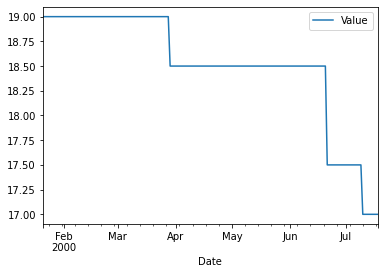

In [183]:
# Obtendo da linha 20 até a linha 200 ( lembrando também da indexação, 200 não inclusiva)

selic_filtrada = selic.iloc[20:200]
selic_filtrada.plot()

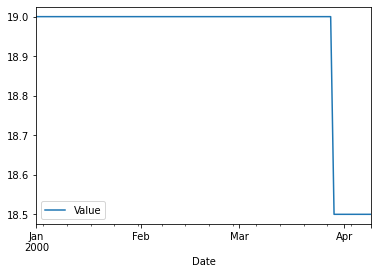

In [184]:
# Obtendo todas as linhas até a linha 100 ( linha 100 não entra)

selic_filtrada = selic.iloc[:100]
selic_filtrada.plot()

## 2.3. Noções importantes de dataframes

Para demonstrar manipulações de dados em um dataframes de várias colunas, vamos extrair os dados das ações que compôem o IBOV

Para saber a composição atualizada do IBOV, acesse o link:https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

Nesta seção, vamos utilizar algumas bibliotecas de dados de mercado financeiro, como a yfinance, que extrai dados do Yahoo Finance

Os ativos que compôem o IBOV são os seguintes:
['WEGE3','EMBR3','AZUL4','CCRO3','ECOR3','GOLL4','RAIL3','POSI3','BRFS3','JBSS3','MRFG3','BEEF3','ABEV3','ASAI3','CRFB3','PCAR3',
 'NTCO3','AMER3','SOMA30','LREN3','MGLU3','PETZ3','VIIA3','ALPA4','CYRE3','EZTC3','JHSF3','MRVE3','CVCB3','COFN3','RENT3','LCAM3',
 'YDYQ3','BRML3','IGTI11','MULT3','DIBI11','BPAN4','BBDC3','BBDC4','BPAC11','ITSA4','ITUB4','SANB11','BBSE3','IRBR3','SULA11',
 'PETR4','PRIO3','UGPA3','VBBR3','HYPE3','RADL3','FLRY3','HAPV3','GNDI3','QUAL3','RDOR3','LWSA3','CASH3','TOTS3','VIVT3','TIMS3',
 'SBSP3','CMIG4','CPLE6','CPFE3','ELET3','ELET6','ENBR3','ENGI11','ENEV3','EGIE3','EQTL3','TAEE11']

Vamos transformar isso agora numa lista

In [185]:
tickers_IBOV = ['ABCB4','BBAS3','BBDC4','BPAN4','BTOW3','CGAS3','CMIG4','CSNA3','CYRE3','ELET3','ELPL4','ENBR3','EQTL3','EZTC3','FIBR3','GOAU4','HGTX3','ITUB4','LAME4','LREN3','MRVE3','MYPK3','PETR4','POMO4','QGEP3','RAPT4','SAPR4','SBSP3','SUZB5','TUPY3','USIM5','VALE5','WEGE3']

In [186]:
# Como ordenar esses papéis em ordem alfabética?

tickers_IBOV.sort()
tickers_IBOV

['ABCB4',
 'BBAS3',
 'BBDC4',
 'BPAN4',
 'BTOW3',
 'CGAS3',
 'CMIG4',
 'CSNA3',
 'CYRE3',
 'ELET3',
 'ELPL4',
 'ENBR3',
 'EQTL3',
 'EZTC3',
 'FIBR3',
 'GOAU4',
 'HGTX3',
 'ITUB4',
 'LAME4',
 'LREN3',
 'MRVE3',
 'MYPK3',
 'PETR4',
 'POMO4',
 'QGEP3',
 'RAPT4',
 'SAPR4',
 'SBSP3',
 'SUZB5',
 'TUPY3',
 'USIM5',
 'VALE5',
 'WEGE3']

** PONTO IMPORTANTE **

As ações brasileiras no Yahoo Finance terminam com ".SA". Isso é válido inclusive para outros papéis, como ETFs, FIIs, BDRs


Como acrescentar ".SA" ao fim do nome de um papel?

Veja o raciocínio abaixo:

In [187]:
acao = 'PETR4'

acao + '.SA'

# Observe que "somamos" o ".SA" ao ticker de "PETR4"


'PETR4.SA'

Precisamos então criar uma estrutura que faça isso para todos os papéis de uma vez

In [188]:
ativo_SA = 0
tickers_IBOV_SA = []

for i in tickers_IBOV: 
  ativo_SA = (i +'.SA')
  tickers_IBOV_SA.append(ativo_SA)

tickers_IBOV_SA

['ABCB4.SA',
 'BBAS3.SA',
 'BBDC4.SA',
 'BPAN4.SA',
 'BTOW3.SA',
 'CGAS3.SA',
 'CMIG4.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'ELET3.SA',
 'ELPL4.SA',
 'ENBR3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FIBR3.SA',
 'GOAU4.SA',
 'HGTX3.SA',
 'ITUB4.SA',
 'LAME4.SA',
 'LREN3.SA',
 'MRVE3.SA',
 'MYPK3.SA',
 'PETR4.SA',
 'POMO4.SA',
 'QGEP3.SA',
 'RAPT4.SA',
 'SAPR4.SA',
 'SBSP3.SA',
 'SUZB5.SA',
 'TUPY3.SA',
 'USIM5.SA',
 'VALE5.SA',
 'WEGE3.SA']

Uma vez que temos uma lista com o nome dos tickers corrigidos para fazer a busca na yfinance (que extrai os dados Yahoo Finance)

In [189]:
# Extração para um ativo 

yf.download('PETR4.SA', start = '2022-02-01', end='2022-02-18', period ='1d')


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,32.349998,33.320000,31.950001,33.000000,27.068611,57315200
2022-02-02,33.410000,33.490002,32.360001,32.520000,26.674887,36271700
2022-02-03,32.349998,32.919998,31.620001,32.070000,26.305767,51087800
2022-02-04,32.410000,33.230000,31.879999,32.630001,26.765116,59346800
2022-02-07,32.549999,32.779999,32.130001,32.150002,26.371389,48868100
2022-02-08,31.900000,31.950001,31.260000,31.830000,26.108906,62590000
2022-02-09,31.740000,32.689999,31.650000,31.950001,26.207338,50960500
2022-02-10,32.299999,32.900002,31.940001,32.439999,26.609264,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,27.692007,88013400


Observe a estrutura dos dados acima. Temos Abertura, Máxima, Mínima, Fechamento, Fechamento Ajustado e Volume. Podemos reproduzir a mesma estrutura caso queiramos obter dados de vários papéis ao mesmo tempo.

In [190]:
# Na yfinance as vezes pode ocorrer erros na busca de alguns ativos (usualmente se for uma unit). Note que nesse caso houve um erro em BIDI11
# Pode ver que é um problema pontual https://finance.yahoo.com/quote/BIDI11.SA/history?p=BIDI11.SA


yf.download(tickers_IBOV_SA, start = '2022-02-01', end='2022-02-18', period ='1d')

[*********************100%***********************]  33 of 33 completed

8 Failed downloads:
- BTOW3.SA: No data found, symbol may be delisted
- FIBR3.SA: No data found for this date range, symbol may be delisted
- SUZB5.SA: No data found for this date range, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- ELPL4.SA: No data found for this date range, symbol may be delisted
- VALE5.SA: No data found for this date range, symbol may be delisted
- QGEP3.SA: No data found, symbol may be delisted


Adj Close                                                        \
             ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                          
2022-02-01  15.915528  31.519228  20.703711  10.326815      NaN  135.359589   
2022-02-02  15.935165  30.997290  20.331472   9.569250      NaN  130.383133   
2022-02-03  15.925346  31.209932  20.630331   9.190467      NaN  129.387848   
2022-02-04  15.846800  31.151939  20.766176   9.180499      NaN  129.387848   
2022-02-07  15.846800  30.794315  20.693726   9.240307      NaN  129.387848   
2022-02-08  15.954803  31.122944  20.575994   9.967968      NaN  129.387848   
2022-02-09  15.512978  30.852308  18.810011   9.967968      NaN  129.387848   
2022-02-10  15.719163  31.190601  19.081697   9.918128      NaN  129.387848   
2022-02-11  16.210079  32.282806  19.145092   9.918128      NaN  123.416100   
2022-02-14  16.200260  32.418121  19.172262   9.997872      NaN  123.416100   
2022-02-15  16.642086  33.954937  19.190374  11.044509      NaN  123.416100   
2022-02-16  16.612631  34.148247  19.416784  11.094349      NaN  124.510918   
2022-02-17  16.386810  34.148247  19.190374  11.253837      NaN  124.510918   

                                                       ...   Volume           \
            CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ... POMO4.SA QGEP3.SA   
Date                                                   ...                     
2022-02-01  9.267416  26.396038  16.578217  33.983326  ...  6511800      NaN   
2022-02-02  9.106668  26.523935  16.183725  33.256935  ...  6341600      NaN   
2022-02-03  9.169570  26.081215  16.183725  33.708477  ...  3568300      NaN   
2022-02-04  8.952911  26.199272  15.375502  33.070427  ...  5685300      NaN   
2022-02-07  8.771196  27.025686  15.279285  32.844658  ...  6217900      NaN   
2022-02-08  8.827108  27.389702  15.269664  32.540359  ...  3453900      NaN   
2022-02-09  8.931944  27.724203  15.250421  33.364914  ...  3541000      NaN   
2022-02-10  8.994845  27.753717  15.173447  33.364914  ...  4230200      NaN   
2022-02-11  8.917966  27.360188  15.260041  32.717052  ...  6280500      NaN   
2022-02-14  8.827108  27.291319  15.317772  32.805393  ...  2522200      NaN   
2022-02-15  9.001834  25.972994  15.972049  34.847141  ...  2835000      NaN   
2022-02-16  9.183548  26.081215  16.010534  34.523209  ...  2579800      NaN   
2022-02-17  9.064734  24.556284  15.606423  34.533028  ...  4627100      NaN   

                                                                            \
           RAPT4.SA SAPR4.SA SBSP3.SA SUZB5.SA TUPY3.SA  USIM5.SA VALE5.SA   
Date                                                                         
2022-02-01  3770400  2395200  2548400      NaN   587600  22618500      NaN   
2022-02-02  3269200  3504100  2232300      NaN   552300  13505200      NaN   
2022-02-03  2567800  2336300  2632700      NaN   907100  20575800      NaN   
2022-02-04  2281900  2113100  1861800      NaN   611700  14148800      NaN   
2022-02-07  1878700  2412700  1242300      NaN   838200  21626800      NaN   
2022-02-08  1081600  2120400  1433900      NaN   510600  14037400      NaN   
2022-02-09  1776100  1880500  1976900      NaN   423900  14784800      NaN   
2022-02-10  1605300  1717700  1353100      NaN   851400  25220700      NaN   
2022-02-11  2563000  4382600  2420100      NaN  1090700  66203500      NaN   
2022-02-14  1526200  2064900  2170800      NaN   317200  23686600      NaN   
2022-02-15  1796800  1641500  1548800      NaN   374200  28728900      NaN   
2022-02-16  2243400  2166600  1986200      NaN   744200  20383200      NaN   
2022-02-17  2103100  1317000  3942000      NaN   502600  29080100      NaN   

                      
            WEGE3.SA  
Date                  
2022-02-01   4459400  
2022-02-02   4925100  
2022-02-03   5506300  
2022-02-04   5170800  
2022-02-07   5010100  
2022-02-08   6430500  
2022-02-09

Perceba que a estrutura acima replica as 5 colunas(Abertura, Máxima, Mínima, Fechamento, Fechamento Ajustado e Volume )para todos OS
papéis. Isso cria uma estrutura muito grande e difícil de trabalhar. É melhor selecionar apenas uma coluna específica para esses papéis:

In [191]:
# Nesse caso, estamos não apenas extraindo os dados, mas armazenando na variável cotacoes_IBOV

cotacoes_IBOV = yf.download(tickers_IBOV_SA, start='2022-02-10', end='2022-02-18', period = '1d')


[*********************100%***********************]  33 of 33 completed

8 Failed downloads:
- BTOW3.SA: No data found, symbol may be delisted
- FIBR3.SA: No data found for this date range, symbol may be delisted
- SUZB5.SA: No data found for this date range, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- ELPL4.SA: No data found for this date range, symbol may be delisted
- QGEP3.SA: No data found, symbol may be delisted
- VALE5.SA: No data found for this date range, symbol may be delisted


Para facilitar nossa vida, podemos obter apenas os dados da coluna Adj Close para todos os papéis de uma vez

In [192]:
yf.download(tickers_IBOV_SA, start='2022-02-10', end='2022-02-18', period = '1d')['Adj Close']

[*********************100%***********************]  33 of 33 completed

8 Failed downloads:
- BTOW3.SA: No data found, symbol may be delisted
- FIBR3.SA: No data found for this date range, symbol may be delisted
- SUZB5.SA: No data found for this date range, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- ELPL4.SA: No data found for this date range, symbol may be delisted
- VALE5.SA: No data found for this date range, symbol may be delisted
- QGEP3.SA: No data found, symbol may be delisted


,ABCB4.SA,BBAS3.SA,BBDC4.SA,BPAN4.SA,BTOW3.SA,CGAS3.SA,CMIG4.SA,CSNA3.SA,CYRE3.SA,ELET3.SA,...,POMO4.SA,QGEP3.SA,RAPT4.SA,SAPR4.SA,SBSP3.SA,SUZB5.SA,TUPY3.SA,USIM5.SA,VALE5.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-10,15.719163,31.190599,19.081697,9.918128,NaN,129.387848,8.994845,27.753717,15.173447,33.364914,...,3.01,NaN,10.965174,3.958247,35.247421,NaN,19.850000,15.920329,NaN,29.502254
2022-02-11,16.210079,32.282803,19.145092,9.918128,NaN,123.416100,8.917966,27.360188,15.260041,32.717052,...,2.92,NaN,10.742775,3.968217,35.315994,NaN,19.219999,14.734368,NaN,29.293934
2022-02-14,16.200260,32.418125,19.172262,9.997872,NaN,123.416100,8.827108,27.291319,15.317772,32.805393,...,2.97,NaN,10.868478,3.898424,34.708622,NaN,19.290001,14.876684,NaN,30.196659
2022-02-15,16.642086,33.954937,19.190374,11.044509,NaN,123.416100,9.001834,25.972994,15.972049,34.847141,...,3.04,NaN,11.119884,3.958247,35.688259,NaN,19.610001,14.791294,NaN,32.617157
2022-02-16,16.612631,34.148251,19.416784,11.094349,NaN,124.510918,9.183548,26.081215,16.010534,34.523209,...,3.05,NaN,11.081206,3.958247,36.070320,NaN,19.360001,14.696417,NaN,31.049784
2022-02-17,16.386810,34.148251,19.190374,11.253837,NaN,124.510918,9.064734,24.556284,15.606423,34.533028,...,2.94,NaN,10.704097,3.938306,36.677692,NaN,19.150000,14.098693,NaN,30.404980


Perceba que reduzimos o número de colunas de 552 para 92 ( Adj Close dos 92 ativos da lita
                                                          )

Vamos criar um novo dartaframe com o resultado da busca de cotação ao longo de todo o período de 2021, considerando todos as colunas disponíveis (OHLC,Adj Close e Volume)

In [193]:
cotacoes_IBOV = yf.download(tickers_IBOV_SA, start='2021-01-01', end='2021-12-31', period ="1d")
cotacoes_IBOV

[*********************100%***********************]  33 of 33 completed

8 Failed downloads:
- BTOW3.SA: No data found, symbol may be delisted
- FIBR3.SA: No data found for this date range, symbol may be delisted
- SUZB5.SA: No data found for this date range, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- ELPL4.SA: No data found for this date range, symbol may be delisted
- QGEP3.SA: No data found, symbol may be delisted
- VALE5.SA: No data found for this date range, symbol may be delisted


Adj Close                                                        \
             ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                          
2021-01-04  14.575881  33.724117  20.771681   9.127254      NaN  151.589432   
2021-01-05  14.368941  33.374233  20.645033   9.088248      NaN  151.654083   
2021-01-06  14.530895  34.136814  21.329271   9.068746      NaN  151.654083   
2021-01-07  15.016089  35.491520  21.895536   9.146756      NaN  151.654083   
2021-01-08  14.997598  35.697868  21.706781   9.332030      NaN  156.983231   
...               ...        ...        ...        ...      ...         ...   
2021-12-23  15.237659  28.242620  17.393166  10.815247      NaN  134.364304   
2021-12-27  15.430908  28.300615  17.592045  10.466367      NaN  138.335510   
2021-12-28  15.595168  28.136299  17.528763  10.496270      NaN  139.340759   
2021-12-29  15.295633  27.991314  17.447403  10.546110      NaN  148.278473   
2021-12-30  15.334284  27.884996  17.366041  10.645791      NaN  148.278473   

                                                       ...      Volume  \
            CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...    POMO4.SA   
Date                                                   ...               
2021-01-04  8.125487  32.015362  26.252213  32.503201  ...   6038000.0   
2021-01-05  8.125487  32.596264  25.745594  31.663935  ...   5522900.0   
2021-01-06  8.292133  33.973568  25.082376  31.153080  ...   6941500.0   
2021-01-07  8.200191  36.100430  25.238970  30.934141  ...   5788800.0   
2021-01-08  8.763343  36.315929  26.445650  31.910236  ...  19457700.0   
...              ...        ...        ...        ...  ...         ...   
2021-12-23  9.141613  24.058908  14.538413  32.638519  ...   5473700.0   
2021-12-27  9.197526  24.322435  14.788578  32.618889  ...   2832400.0   
2021-12-28  9.232471  24.351715  14.798200  32.785763  ...   2795700.0   
2021-12-29  9.113658  24.439558  14.827065  32.393120  ...   4142100.0   
2021-12-30  9.162580  24.390757  15.183068  32.795578  ...   5386200.0   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2021-01-04      NaN  5359600.0   8044700.0  5274100.0      NaN  1828900.0   
2021-01-05      NaN  2517600.0  10266800.0  4327600.0      NaN  2884200.0   
2021-01-06      NaN  3757700.0   7426500.0  5286800.0      NaN  1970700.0   
2021-01-07      NaN  3642200.0   8106000.0  4030500.0      NaN   983800.0   
2021-01-08      NaN  3434500.0   6915700.0  6990900.0      NaN  1648600.0   
...             ...        ...         ...        ...      ...        ...   
2021-12-23      NaN  2442200.0   1669000.0  2098900.0      NaN   260700.0   
2021-12-27      NaN  2096100.0   1918100.0  1891600.0      NaN   244700.0   
2021-12-28      NaN  1844800.0   1860200.0   735000.0      NaN   427600.0   
2021-12-29      NaN  1588600.0   2067100.0  1217400.0      NaN   365200.0   
2021-12-30      NaN  3155100.0   6216100.0  2020000.0      NaN   646300.0   

                                             
              USIM5.SA VALE5.SA    WEGE3.SA  
Date                                         
2021-01-04  20687900.0      NaN   7219800.0  
2021-01-05  18302900.0      NaN  16633600.0  
2021-01-06  23592900.0      NaN  21507400.0  
2021-01-07  22298600.0      NaN  15129600.0  
2021-01-08  23237000.0      NaN  17381000.0  
...                ...      ...         ...  
2021-12-23  10681800.0      NaN   2166400.0  
2021-12-27  10504500.0      NaN   4457200.0  
2021-12-28  13201600.0      NaN   3670800.0  
2021-12-29  10525500.0      NaN   3091700.0  
2021-12-30  12815100.0      NaN   4858300.0  

[248 rows x 198 columns]

In [194]:
# Reforçando a complexidade do dataframe, composto por pois índices de colunas
# Indice 0 para os parâmetros das cotações e índice 1 para os ativos

cotacoes_IBOV.columns

MultiIndex([('Adj Close', 'ABCB4.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ('Adj Close', 'BPAN4.SA'),
            ('Adj Close', 'BTOW3.SA'),
            ('Adj Close', 'CGAS3.SA'),
            ('Adj Close', 'CMIG4.SA'),
            ('Adj Close', 'CSNA3.SA'),
            ('Adj Close', 'CYRE3.SA'),
            ('Adj Close', 'ELET3.SA'),
            ...
            (   'Volume', 'POMO4.SA'),
            (   'Volume', 'QGEP3.SA'),
            (   'Volume', 'RAPT4.SA'),
            (   'Volume', 'SAPR4.SA'),
            (   'Volume', 'SBSP3.SA'),
            (   'Volume', 'SUZB5.SA'),
            (   'Volume', 'TUPY3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE5.SA'),
            (   'Volume', 'WEGE3.SA')],
           length=198)

In [195]:
# Usando o set ( conjunto ) podemos remover as duplicatas e ver a lista de parâmetros disponíveis

set(cotacoes_IBOV.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [196]:
cotacoes_IBOV.head()

Adj Close                                                       \
             ABCB4.SA   BBAS3.SA   BBDC4.SA  BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                         
2021-01-04  14.575881  33.724117  20.771681  9.127254      NaN  151.589432   
2021-01-05  14.368941  33.374233  20.645033  9.088248      NaN  151.654083   
2021-01-06  14.530895  34.136814  21.329271  9.068746      NaN  151.654083   
2021-01-07  15.016089  35.491520  21.895536  9.146756      NaN  151.654083   
2021-01-08  14.997598  35.697868  21.706781  9.332030      NaN  156.983231   

                                                       ...      Volume  \
            CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...    POMO4.SA   
Date                                                   ...               
2021-01-04  8.125487  32.015362  26.252213  32.503201  ...   6038000.0   
2021-01-05  8.125487  32.596264  25.745594  31.663935  ...   5522900.0   
2021-01-06  8.292133  33.973568  25.082376  31.153080  ...   6941500.0   
2021-01-07  8.200191  36.100430  25.238970  30.934141  ...   5788800.0   
2021-01-08  8.763343  36.315929  26.445650  31.910236  ...  19457700.0   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2021-01-04      NaN  5359600.0   8044700.0  5274100.0      NaN  1828900.0   
2021-01-05      NaN  2517600.0  10266800.0  4327600.0      NaN  2884200.0   
2021-01-06      NaN  3757700.0   7426500.0  5286800.0      NaN  1970700.0   
2021-01-07      NaN  3642200.0   8106000.0  4030500.0      NaN   983800.0   
2021-01-08      NaN  3434500.0   6915700.0  6990900.0      NaN  1648600.0   

                                             
              USIM5.SA VALE5.SA    WEGE3.SA  
Date                                         
2021-01-04  20687900.0      NaN   7219800.0  
2021-01-05  18302900.0      NaN  16633600.0  
2021-01-06  23592900.0      NaN  21507400.0  
2021-01-07  22298600.0      NaN  15129600.0  
2021-01-08  23237000.0      NaN  17381000.0  

[5 rows x 198 columns]

In [197]:
cotacoes_IBOV_Adj_Close = cotacoes_IBOV['Adj Close']
cotacoes_IBOV_Adj_Close

,ABCB4.SA,BBAS3.SA,BBDC4.SA,BPAN4.SA,BTOW3.SA,CGAS3.SA,CMIG4.SA,CSNA3.SA,CYRE3.SA,ELET3.SA,...,POMO4.SA,QGEP3.SA,RAPT4.SA,SAPR4.SA,SBSP3.SA,SUZB5.SA,TUPY3.SA,USIM5.SA,VALE5.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,14.575881,33.724117,20.771681,9.127254,NaN,151.589432,8.125487,32.015362,26.252213,32.503201,...,2.798722,NaN,14.257154,4.684396,41.305840,NaN,21.693159,13.088719,NaN,36.591400
2021-01-05,14.368941,33.374233,20.645033,9.088248,NaN,151.654083,8.125487,32.596264,25.745594,31.663935,...,2.750301,NaN,14.017848,4.561867,41.208782,NaN,22.525629,13.228894,NaN,38.837284
2021-01-06,14.530895,34.136814,21.329271,9.068746,NaN,151.654083,8.292133,33.973568,25.082376,31.153080,...,2.779353,NaN,14.312381,4.467614,41.004971,NaN,22.300371,13.868435,NaN,39.867062
2021-01-07,15.016089,35.491520,21.895536,9.146756,NaN,151.654083,8.200191,36.100430,25.238970,30.934141,...,2.759985,NaN,14.192727,4.373360,40.975857,NaN,22.368929,14.534260,NaN,41.514709
2021-01-08,14.997598,35.697868,21.706781,9.332030,NaN,156.983231,8.763343,36.315929,26.445650,31.910236,...,2.953668,NaN,14.165115,4.458189,42.334599,NaN,23.103460,14.464173,NaN,44.025402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15.237659,28.242620,17.393166,10.815247,NaN,134.364304,9.141613,24.058908,14.538413,32.638519,...,2.794505,NaN,10.027235,3.700973,39.077812,NaN,20.039396,14.098693,NaN,33.202438
2021-12-27,15.430908,28.300615,17.592045,10.466367,NaN,138.335510,9.197526,24.322435,14.788578,32.618889,...,2.883376,NaN,10.375336,3.720299,39.234554,NaN,20.297457,14.269472,NaN,32.904831
2021-12-28,15.595168,28.136299,17.528763,10.496270,NaN,139.340759,9.232471,24.351715,14.798200,32.785763,...,2.913000,NaN,10.336658,3.749289,39.224758,NaN,20.456264,13.994329,NaN,33.023880


In [198]:
yf.download('BBAS3.SA WEGE3.SA', start = '2022-02-01', end = '2022-02-18', period = '1d') 

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                  High             \
             BBAS3.SA   WEGE3.SA   BBAS3.SA   WEGE3.SA   BBAS3.SA   WEGE3.SA   
Date                                                                           
2022-02-01  31.519228  31.803709  32.610001  32.060001  32.830002  32.689999   
2022-02-02  30.997290  31.516027  32.070000  31.770000  32.599998  32.919998   
2022-02-03  31.209932  30.702581  32.290001  30.950001  32.580002  32.110001   
2022-02-04  31.151939  30.603382  32.230000  30.850000  32.410000  30.980000   
2022-02-07  30.794315  30.752182  31.860001  31.000000  32.380001  31.340000   
2022-02-08  31.122944  29.978416  32.200001  30.219999  32.369999  30.940001   
2022-02-09  30.852308  30.047859  31.920000  30.290001  32.509998  30.969999   
2022-02-10  31.190601  29.502254  32.270000  29.740000  32.639999  30.549999   
2022-02-11  32.282806  29.293934  33.400002  29.530001  33.590000  30.010000   
2022-02-14  32.418121  30.196659  33.540001  30.440001  33.740002  30.940001   
2022-02-15  33.954937  32.617157  35.130001  32.880001  35.700001  32.880001   
2022-02-16  34.148247  31.049784  35.330002  31.299999  35.790001  33.169998   
2022-02-17  34.148247  30.404980  35.330002  30.650000  35.730000  31.820000   

                  Low                  Open               Volume            
             BBAS3.SA   WEGE3.SA   BBAS3.SA   WEGE3.SA  BBAS3.SA  WEGE3.SA  
Date                                                                        
2022-02-01  32.349998  31.770000  32.799999  32.099998   8298100   4459400  
2022-02-02  31.770000  31.660000  32.520000  32.209999  11941900   4925100  
2022-02-03  32.020000  30.870001  32.080002  31.820000  11751300   5506300  
2022-02-04  32.009998  30.440001  32.200001  30.959999   7384200   5170800  
2022-02-07  31.840000  30.520000  32.130001  30.900000   8555700   5010100  
2022-02-08  31.490000  30.049999  31.820000  30.770000  11923400   6430500  
2022-02-09  31.700001  30.270000  32.099998  30.540001  16377100   5009700  
2022-02-10  31.860001  29.620001  32.000000  30.290001  14344300   8569200  
2022-02-11  32.439999  29.459999  32.459999  29.799999  32331800   9352700  
2022-02-14  33.119999  29.500000  33.400002  29.500000  16485500  10962400  
2022-02-15  34.939999  30.959999  35.500000  31.000000  49098300  11758400  
2022-02-16  35.110001  30.770000  35.180000  33.000000  17748100  20714400  
2022-02-17  35.169998  30.570000  35.310001  31.559999  14383100   8085500

In [199]:
# Filtrar apenas o índice que contém os preços de Adj Close e ABEV3.SA ao mesmo tempo ( acaba sendo uma única coluna)
# Como é apenas uma coluna, ele desconsidera o formato dateframe e traz como um formato "series" da biblioteca pandas
# Usando pd.DataFrame podemos reconfigurar como datafame

cotacoes_IBOV_Adj_Close_SAPR4 = cotacoes_IBOV[('Adj Close','SAPR4.SA')]
# cotacoes_IBOV_Adj_Close_SAPR4
# Tranformando em DataFrame

cotacoes_IBOV_Adj_Close_SAPR4 = pd.DataFrame(cotacoes_IBOV_Adj_Close_SAPR4)
cotacoes_IBOV_Adj_Close_SAPR4


,Adj Close
,SAPR4.SA
Date,
2021-01-04,4.684396
2021-01-05,4.561867
2021-01-06,4.467614
2021-01-07,4.373360
2021-01-08,4.458189
...,...
2021-12-23,3.700973
2021-12-27,3.720299


# Módulo 3 - Aula 2: Missings

In [200]:
cotacoes_IBOV.isna()

Adj Close                                                        \
            ABCB4.SA BBAS3.SA BBDC4.SA BPAN4.SA BTOW3.SA CGAS3.SA CMIG4.SA   
Date                                                                         
2021-01-04     False    False    False    False     True    False    False   
2021-01-05     False    False    False    False     True    False    False   
2021-01-06     False    False    False    False     True    False    False   
2021-01-07     False    False    False    False     True    False    False   
2021-01-08     False    False    False    False     True    False    False   
...              ...      ...      ...      ...      ...      ...      ...   
2021-12-23     False    False    False    False     True    False    False   
2021-12-27     False    False    False    False     True    False    False   
2021-12-28     False    False    False    False     True    False    False   
2021-12-29     False    False    False    False     True    False    False   
2021-12-30     False    False    False    False     True    False    False   

                                       ...   Volume                    \
           CSNA3.SA CYRE3.SA ELET3.SA  ... POMO4.SA QGEP3.SA RAPT4.SA   
Date                                   ...                              
2021-01-04    False    False    False  ...    False     True    False   
2021-01-05    False    False    False  ...    False     True    False   
2021-01-06    False    False    False  ...    False     True    False   
2021-01-07    False    False    False  ...    False     True    False   
2021-01-08    False    False    False  ...    False     True    False   
...             ...      ...      ...  ...      ...      ...      ...   
2021-12-23    False    False    False  ...    False     True    False   
2021-12-27    False    False    False  ...    False     True    False   
2021-12-28    False    False    False  ...    False     True    False   
2021-12-29    False    False    False  ...    False     True    False   
2021-12-30    False    False    False  ...    False     True    False   

                                                                           
           SAPR4.SA SBSP3.SA SUZB5.SA TUPY3.SA USIM5.SA VALE5.SA WEGE3.SA  
Date                                                                       
2021-01-04    False    False     True    False    False     True    False  
2021-01-05    False    False     True    False    False     True    False  
2021-01-06    False    False     True    False    False     True    False  
2021-01-07    False    False     True    False    False     True    False  
2021-01-08    False    False     True    False    False     True    False  
...             ...      ...      ...      ...      ...      ...      ...  
2021-12-23    False    False     True    False    False     True    False  
2021-12-27    False    False     True    False    False     True    False  
2021-12-28    False    False     True    False    False     True    False  
2021-12-29    False    False     True    False    False     True    False  
2021-12-30    False    False     True    False    False     True    False  

[248 rows x 198 columns]

In [201]:
# O método isna() retorna um booleano(True/False). Como vimos, no Python o True equivale a 1 e False equivale a 0.
# Se eu somar uma coluna/linha composta por True/False eu consigo saber qts True existem ( e nesse caso do .isna, saber qts NaS exemtem)
# O método sum() = sum(0), já que 0 é o default do método e representa a soma de todas as células de uma coluna. Se colocarmos sum(1), teremos a soma de todas as celulas de uma linha


count_null = cotacoes_IBOV.isna().sum()
count_null

# O output a seguir me mostra que existe 0 NA na coluna de Adj Close ( podemos checar a data logo abaixo pra ver pq isso aconteceu com todos os ativos)
# Já BTOW3.SA possui 6 célular com NA. Começou a ser negociada no IBOV recentemente

Adj Close  ABCB4.SA      1
           BBAS3.SA      1
           BBDC4.SA      1
           BPAN4.SA      1
           BTOW3.SA    248
                      ... 
Volume     SUZB5.SA    248
           TUPY3.SA      1
           USIM5.SA      1
           VALE5.SA    248
           WEGE3.SA      1
Length: 198, dtype: int64

In [202]:
# Soma dos NAs por linhas. Lembrando que uma linha é composta por 6 índices 0 (Adj Close','Close','High','Low','Open','Volume)
count_null_linha = cotacoes_IBOV.isna().sum(1)
count_null_linha

Date
2021-01-04    48
2021-01-05    48
2021-01-06    48
2021-01-07    48
2021-01-08    48
              ..
2021-12-23    48
2021-12-27    48
2021-12-28    48
2021-12-29    48
2021-12-30    48
Length: 248, dtype: int64

In [203]:
# Método shape retorna o número de linhas e coluna de um dataframe

cotacoes_IBOV.shape

(248, 198)

In [204]:
cotacoes_IBOV.shape[1]

198

In [205]:
# Duas formas de obter o número de colunas 

print(cotacoes_IBOV.shape[1])
len(cotacoes_IBOV.columns)

198


198

In [206]:
# Usando as informações do shape e do isna, podemos fazer um filtro para retornar quais linhas (cotacoes_IBOV.shape[0]
# ou colunas cotacoes_IBOV.shape[1] possuem uma fração específica de NAs

# No exemplo, exibir as linhas onde temos pelo menos 1 NA

cotacoes_IBOV[cotacoes_IBOV.isna().sum(1) > 0 ]

Adj Close                                                        \
             ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                          
2021-01-04  14.575881  33.724117  20.771681   9.127254      NaN  151.589432   
2021-01-05  14.368941  33.374233  20.645033   9.088248      NaN  151.654083   
2021-01-06  14.530895  34.136814  21.329271   9.068746      NaN  151.654083   
2021-01-07  15.016089  35.491520  21.895536   9.146756      NaN  151.654083   
2021-01-08  14.997598  35.697868  21.706781   9.332030      NaN  156.983231   
...               ...        ...        ...        ...      ...         ...   
2021-12-23  15.237659  28.242620  17.393166  10.815247      NaN  134.364304   
2021-12-27  15.430908  28.300615  17.592045  10.466367      NaN  138.335510   
2021-12-28  15.595168  28.136299  17.528763  10.496270      NaN  139.340759   
2021-12-29  15.295633  27.991314  17.447403  10.546110      NaN  148.278473   
2021-12-30  15.334284  27.884996  17.366041  10.645791      NaN  148.278473   

                                                       ...      Volume  \
            CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...    POMO4.SA   
Date                                                   ...               
2021-01-04  8.125487  32.015362  26.252213  32.503201  ...   6038000.0   
2021-01-05  8.125487  32.596264  25.745594  31.663935  ...   5522900.0   
2021-01-06  8.292133  33.973568  25.082376  31.153080  ...   6941500.0   
2021-01-07  8.200191  36.100430  25.238970  30.934141  ...   5788800.0   
2021-01-08  8.763343  36.315929  26.445650  31.910236  ...  19457700.0   
...              ...        ...        ...        ...  ...         ...   
2021-12-23  9.141613  24.058908  14.538413  32.638519  ...   5473700.0   
2021-12-27  9.197526  24.322435  14.788578  32.618889  ...   2832400.0   
2021-12-28  9.232471  24.351715  14.798200  32.785763  ...   2795700.0   
2021-12-29  9.113658  24.439558  14.827065  32.393120  ...   4142100.0   
2021-12-30  9.162580  24.390757  15.183068  32.795578  ...   5386200.0   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2021-01-04      NaN  5359600.0   8044700.0  5274100.0      NaN  1828900.0   
2021-01-05      NaN  2517600.0  10266800.0  4327600.0      NaN  2884200.0   
2021-01-06      NaN  3757700.0   7426500.0  5286800.0      NaN  1970700.0   
2021-01-07      NaN  3642200.0   8106000.0  4030500.0      NaN   983800.0   
2021-01-08      NaN  3434500.0   6915700.0  6990900.0      NaN  1648600.0   
...             ...        ...         ...        ...      ...        ...   
2021-12-23      NaN  2442200.0   1669000.0  2098900.0      NaN   260700.0   
2021-12-27      NaN  2096100.0   1918100.0  1891600.0      NaN   244700.0   
2021-12-28      NaN  1844800.0   1860200.0   735000.0      NaN   427600.0   
2021-12-29      NaN  1588600.0   2067100.0  1217400.0      NaN   365200.0   
2021-12-30      NaN  3155100.0   6216100.0  2020000.0      NaN   646300.0   

                                             
              USIM5.SA VALE5.SA    WEGE3.SA  
Date                                         
2021-01-04  20687900.0      NaN   7219800.0  
2021-01-05  18302900.0      NaN  16633600.0  
2021-01-06  23592900.0      NaN  21507400.0  
2021-01-07  22298600.0      NaN  15129600.0  
2021-01-08  23237000.0      NaN  17381000.0  
...                ...      ...         ...  
2021-12-23  10681800.0      NaN   2166400.0  
2021-12-27  10504500.0      NaN   4457200.0  
2021-12-28  13201600.0      NaN   3670800.0  
2021-12-29  10525500.0      NaN   3091700.0  
2021-12-30  12815100.0      NaN   4858300.0  

[248 rows x 198 columns]

In [207]:
cotacoes_IBOV[cotacoes_IBOV.isna().sum(1) > 0 ].head(3)

Adj Close                                                       \
             ABCB4.SA   BBAS3.SA   BBDC4.SA  BPAN4.SA BTOW3.SA    CGAS3.SA   
Date                                                                         
2021-01-04  14.575881  33.724117  20.771681  9.127254      NaN  151.589432   
2021-01-05  14.368941  33.374233  20.645033  9.088248      NaN  151.654083   
2021-01-06  14.530895  34.136814  21.329271  9.068746      NaN  151.654083   

                                                       ...     Volume  \
            CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA  ...   POMO4.SA   
Date                                                   ...              
2021-01-04  8.125487  32.015362  26.252213  32.503201  ...  6038000.0   
2021-01-05  8.125487  32.596264  25.745594  31.663935  ...  5522900.0   
2021-01-06  8.292133  33.973568  25.082376  31.153080  ...  6941500.0   

                                                                           \
           QGEP3.SA   RAPT4.SA    SAPR4.SA   SBSP3.SA SUZB5.SA   TUPY3.SA   
Date                                                                        
2021-01-04      NaN  5359600.0   8044700.0  5274100.0      NaN  1828900.0   
2021-01-05      NaN  2517600.0  10266800.0  4327600.0      NaN  2884200.0   
2021-01-06      NaN  3757700.0   7426500.0  5286800.0      NaN  1970700.0   

                                             
              USIM5.SA VALE5.SA    WEGE3.SA  
Date                                         
2021-01-04  20687900.0      NaN   7219800.0  
2021-01-05  18302900.0      NaN  16633600.0  
2021-01-06  23592900.0      NaN  21507400.0  

[3 rows x 198 columns]

In [208]:
cotacoes_IBOV.isna().sum(1) / len(cotacoes_IBOV.columns)

Date
2021-01-04    0.242424
2021-01-05    0.242424
2021-01-06    0.242424
2021-01-07    0.242424
2021-01-08    0.242424
                ...   
2021-12-23    0.242424
2021-12-27    0.242424
2021-12-28    0.242424
2021-12-29    0.242424
2021-12-30    0.242424
Length: 248, dtype: float64

In [209]:
# Agora um filtro de NA mais complexo, onde os NAs representem mais de 50% dos dados de uma linha( NAs da linha / total de coluna > 0.5)
# Vemos que nenhuma linha possui tantos NAs

cotacoes_IBOV[(cotacoes_IBOV.isna().sum(1) / len(cotacoes_IBOV.columns))>0.5]
# Vemos que retornou os dados de todas as datas que não haveria pregão , no nosso exemplo 0

Adj Close                                                        \
            ABCB4.SA BBAS3.SA BBDC4.SA BPAN4.SA BTOW3.SA CGAS3.SA CMIG4.SA   
Date                                                                         
2021-04-02       NaN      NaN      NaN      NaN      NaN      NaN      NaN   

                                       ...   Volume                    \
           CSNA3.SA CYRE3.SA ELET3.SA  ... POMO4.SA QGEP3.SA RAPT4.SA   
Date                                   ...                              
2021-04-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   

                                                                           
           SAPR4.SA SBSP3.SA SUZB5.SA TUPY3.SA USIM5.SA VALE5.SA WEGE3.SA  
Date                                                                       
2021-04-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[1 rows x 198 columns]

In [163]:
# Sabendo disso, posso usar o dropna para retirar qualquer linha que seja NA para o ativo BTW3
# Usando o argumento inplace nem preciso criar uma nova variável ( Ex., cotacoes_IBOV2 que represente dados sem os NAs da sexta-feira de Pascoa)


cotacoes_IBOV.dropna(subset = [('Adj Close','BTOW3.SA')], inplace = True)


In [164]:
cotacoes_IBOV

Empty DataFrame
Columns: [(Adj Close, ABCB4.SA), (Adj Close, BBAS3.SA), (Adj Close, BBDC4.SA), (Adj Close, BPAN4.SA), (Adj Close, BTOW3.SA), (Adj Close, CGAS3.SA), (Adj Close, CMIG4.SA), (Adj Close, CSNA3.SA), (Adj Close, CYRE3.SA), (Adj Close, ELET3.SA), (Adj Close, ELPL4.SA), (Adj Close, ENBR3.SA), (Adj Close, EQTL3.SA), (Adj Close, EZTC3.SA), (Adj Close, FIBR3.SA), (Adj Close, GOAU4.SA), (Adj Close, HGTX3.SA), (Adj Close, ITUB4.SA), (Adj Close, LAME4.SA), (Adj Close, LREN3.SA), (Adj Close, MRVE3.SA), (Adj Close, MYPK3.SA), (Adj Close, PETR4.SA), (Adj Close, POMO4.SA), (Adj Close, QGEP3.SA), (Adj Close, RAPT4.SA), (Adj Close, SAPR4.SA), (Adj Close, SBSP3.SA), (Adj Close, SUZB5.SA), (Adj Close, TUPY3.SA), (Adj Close, USIM5.SA), (Adj Close, VALE5.SA), (Adj Close, WEGE3.SA), (Close, ABCB4.SA), (Close, BBAS3.SA), (Close, BBDC4.SA), (Close, BPAN4.SA), (Close, BTOW3.SA), (Close, CGAS3.SA), (Close, CMIG4.SA), (Close, CSNA3.SA), (Close, CYRE3.SA), (Close, ELET3.SA), (Close, ELPL4.SA), (Close, ENBR3.SA), (Close, EQTL3.SA), (Close, EZTC3.SA), (Close, FIBR3.SA), (Close, GOAU4.SA), (Close, HGTX3.SA), (Close, ITUB4.SA), (Close, LAME4.SA), (Close, LREN3.SA), (Close, MRVE3.SA), (Close, MYPK3.SA), (Close, PETR4.SA), (Close, POMO4.SA), (Close, QGEP3.SA), (Close, RAPT4.SA), (Close, SAPR4.SA), (Close, SBSP3.SA), (Close, SUZB5.SA), (Close, TUPY3.SA), (Close, USIM5.SA), (Close, VALE5.SA), (Close, WEGE3.SA), (High, ABCB4.SA), (High, BBAS3.SA), (High, BBDC4.SA), (High, BPAN4.SA), (High, BTOW3.SA), (High, CGAS3.SA), (High, CMIG4.SA), (High, CSNA3.SA), (High, CYRE3.SA), (High, ELET3.SA), (High, ELPL4.SA), (High, ENBR3.SA), (High, EQTL3.SA), (High, EZTC3.SA), (High, FIBR3.SA), (High, GOAU4.SA), (High, HGTX3.SA), (High, ITUB4.SA), (High, LAME4.SA), (High, LREN3.SA), (High, MRVE3.SA), (High, MYPK3.SA), (High, PETR4.SA), (High, POMO4.SA), (High, QGEP3.SA), (High, RAPT4.SA), (High, SAPR4.SA), (High, SBSP3.SA), (High, SUZB5.SA), (High, TUPY3.SA), (High, USIM5.SA), (High, VALE5.SA), (High, WEGE3.SA), (Low, ABCB4.SA), ...]
Index: []

[0 rows x 198 columns]

In [210]:
# Os ativos contém todos os dados de cotações

count_null = cotacoes_IBOV.isna().sum()
count_null

Adj Close  ABCB4.SA      1
           BBAS3.SA      1
           BBDC4.SA      1
           BPAN4.SA      1
           BTOW3.SA    248
                      ... 
Volume     SUZB5.SA    248
           TUPY3.SA      1
           USIM5.SA      1
           VALE5.SA    248
           WEGE3.SA      1
Length: 198, dtype: int64

In [211]:
# Assim conseguimos saber quais ativos possuem pelo menos 1 NA 

cotacoes_IBOV.columns[cotacoes_IBOV.isna().sum()>=1]

MultiIndex([('Adj Close', 'ABCB4.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ('Adj Close', 'BPAN4.SA'),
            ('Adj Close', 'BTOW3.SA'),
            ('Adj Close', 'CGAS3.SA'),
            ('Adj Close', 'CMIG4.SA'),
            ('Adj Close', 'CSNA3.SA'),
            ('Adj Close', 'CYRE3.SA'),
            ('Adj Close', 'ELET3.SA'),
            ...
            (   'Volume', 'POMO4.SA'),
            (   'Volume', 'QGEP3.SA'),
            (   'Volume', 'RAPT4.SA'),
            (   'Volume', 'SAPR4.SA'),
            (   'Volume', 'SBSP3.SA'),
            (   'Volume', 'SUZB5.SA'),
            (   'Volume', 'TUPY3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE5.SA'),
            (   'Volume', 'WEGE3.SA')],
           length=198)

In [212]:
cotacoes_IBOV_filter_NA  = cotacoes_IBOV.drop(cotacoes_IBOV.columns[cotacoes_IBOV.isna().sum()>=1], axis = 1)
cotacoes_IBOV_filter_NA

Date
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
...
2021-12-23
2021-12-27
2021-12-28
2021-12-29


In [213]:
cotacoes_IBOV_filter_NA.columns

MultiIndex([], )

In [214]:
count_null = cotacoes_IBOV_filter_NA.isna().sum()
count_null

Series([], dtype: float64)

In [215]:
# Nesse caso, vemos que não há nenhum NA na tabela

sum(count_null)

0

In [216]:
# BTOW3 por exemplo não está mais neste dataframe

cotacoes_IBOV_filter_NA

Date
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
...
2021-12-23
2021-12-27
2021-12-28
2021-12-29


In [132]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
import missingno as msno

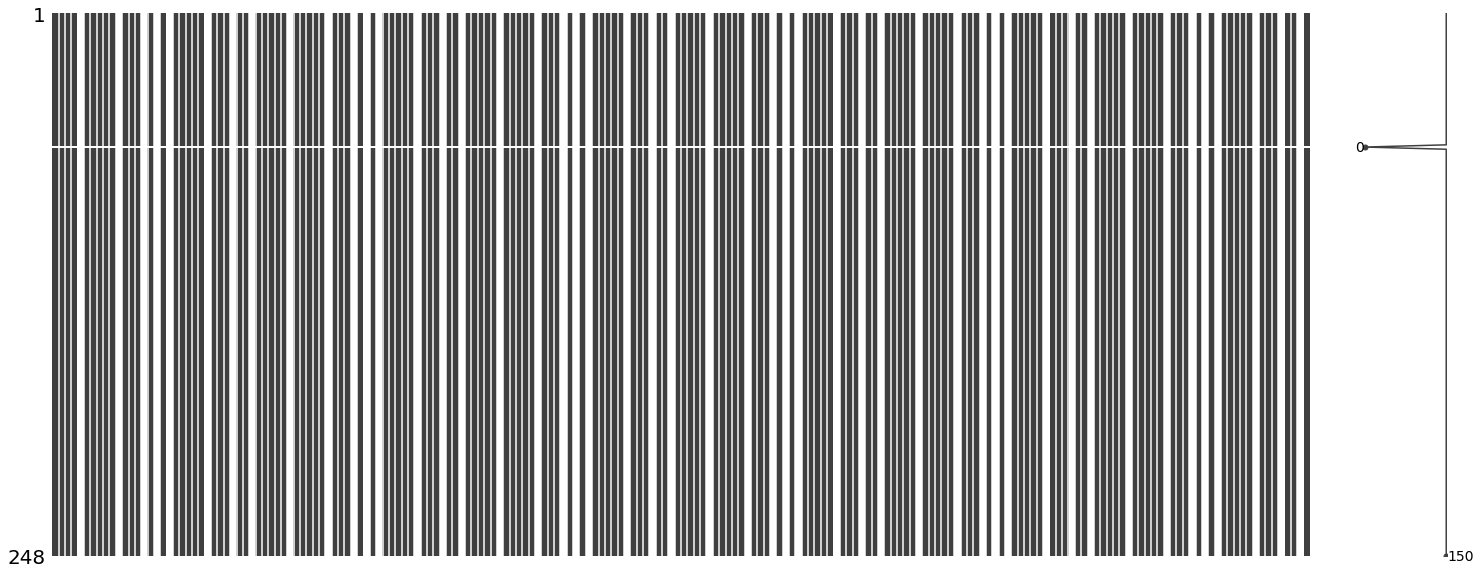

In [221]:
msno.matrix(cotacoes_IBOV)


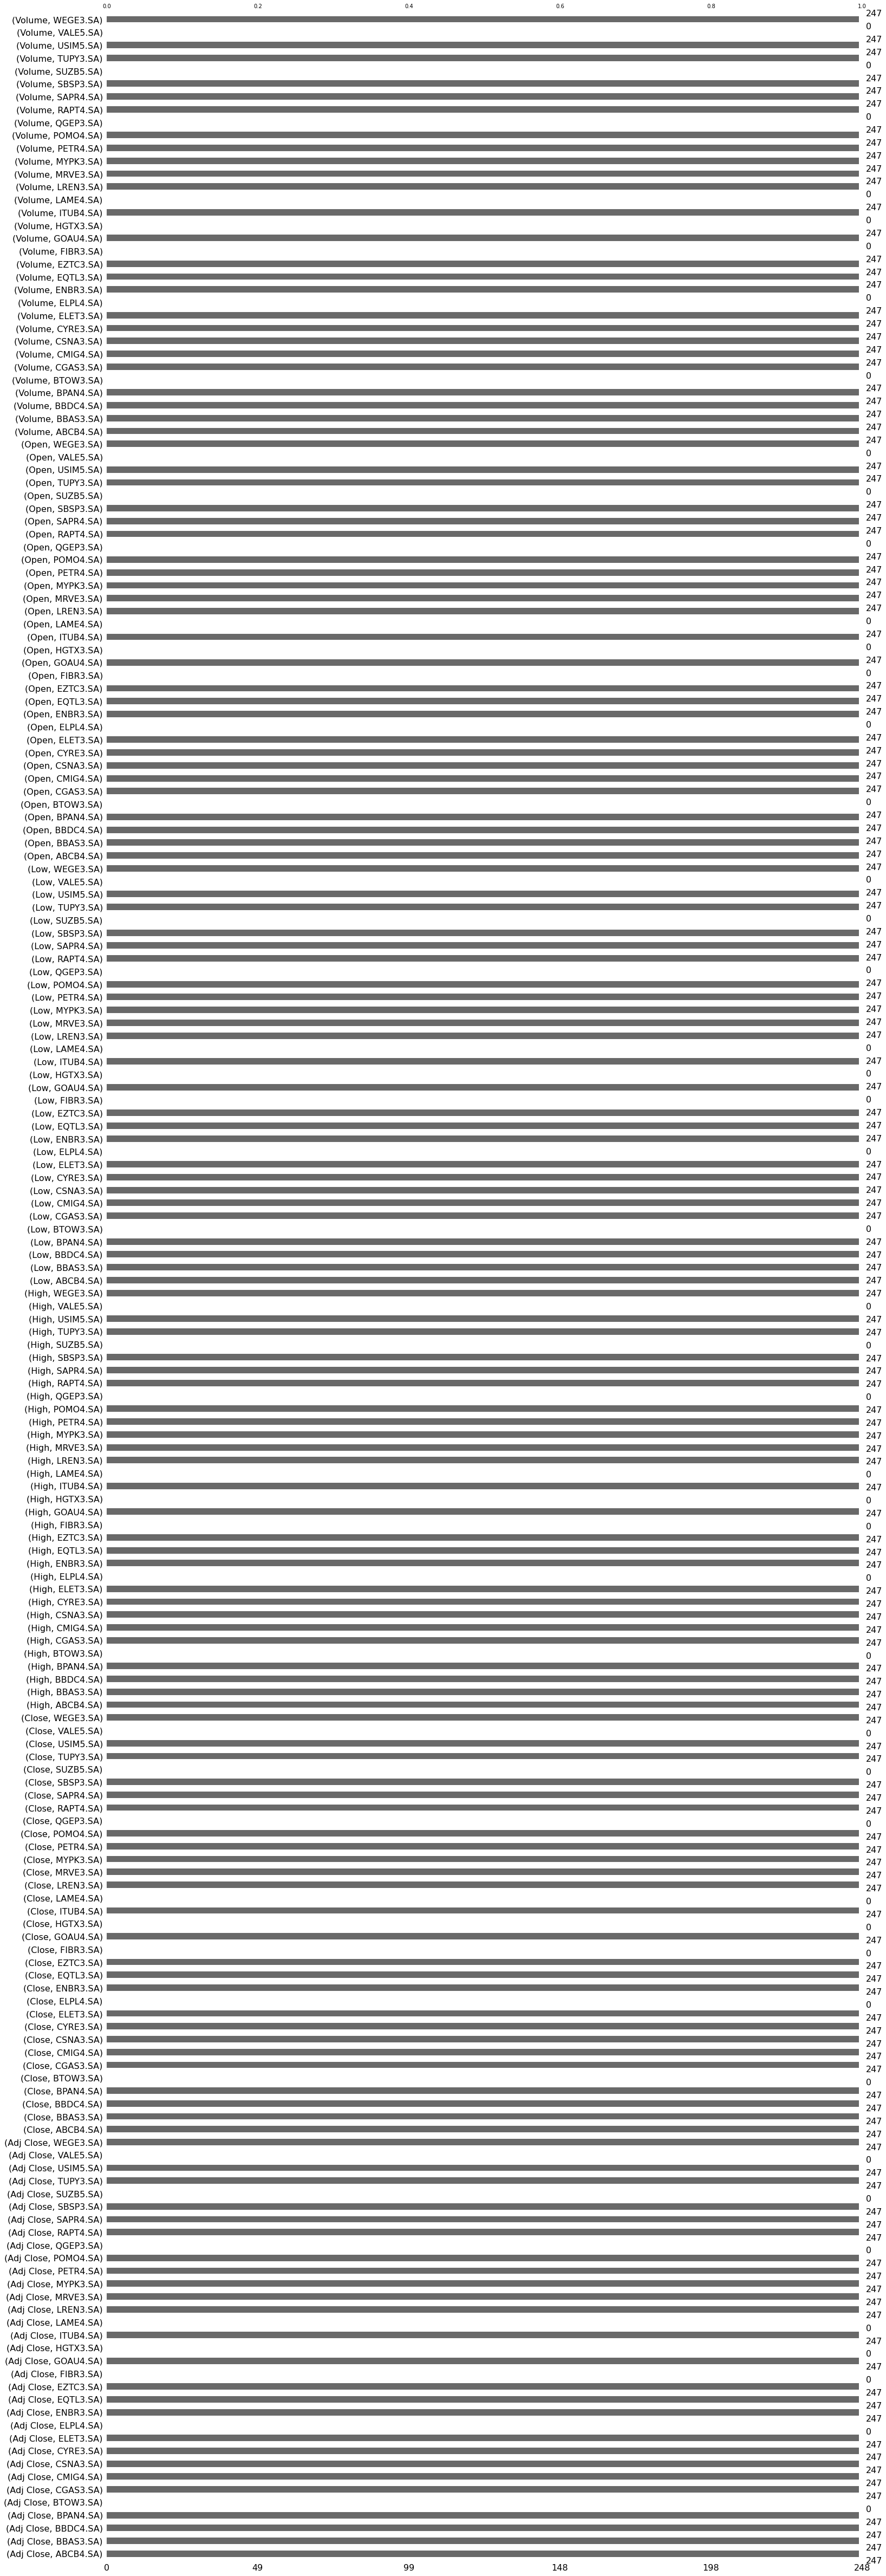

In [219]:
msno.bar(cotacoes_IBOV)

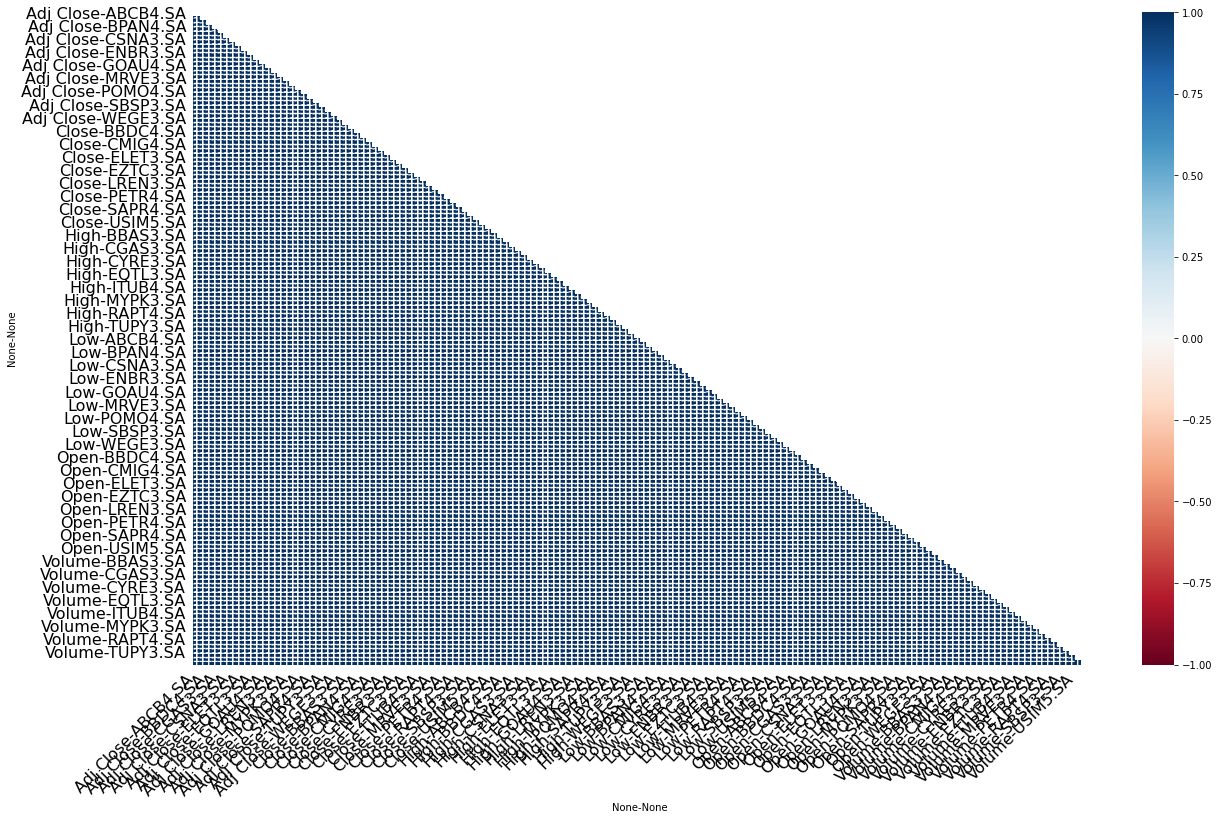

In [222]:
# Exibe a correlação entre o número de missings
# em diferentes colunas como um mapa de calor(heatmap)

msno.heatmap(cotacoes_IBOV)

ValueError: ignored

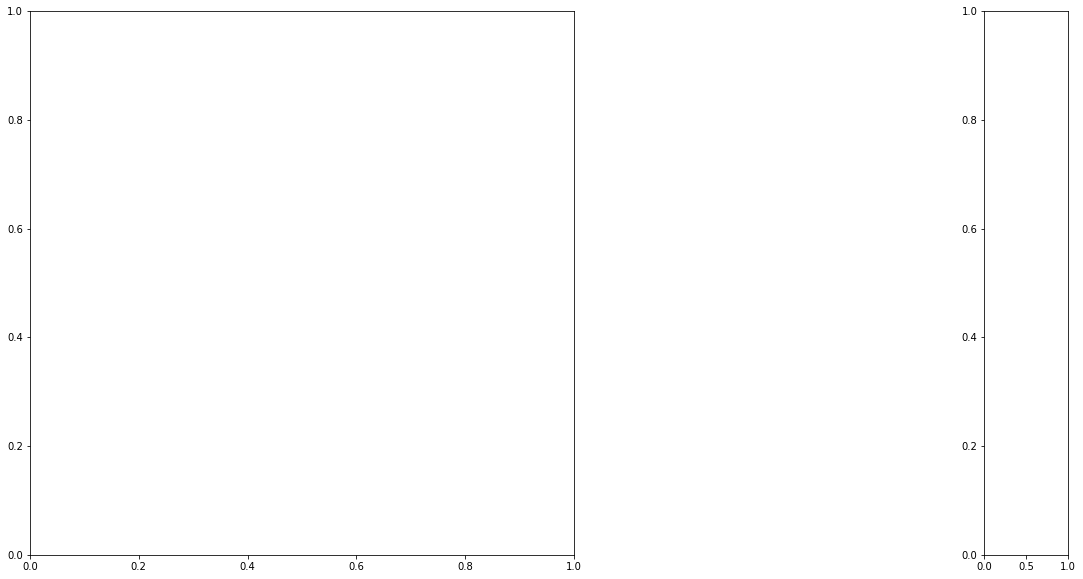

In [223]:
msno.matrix(cotacoes_IBOV_filter_NA)

IndexError: ignored

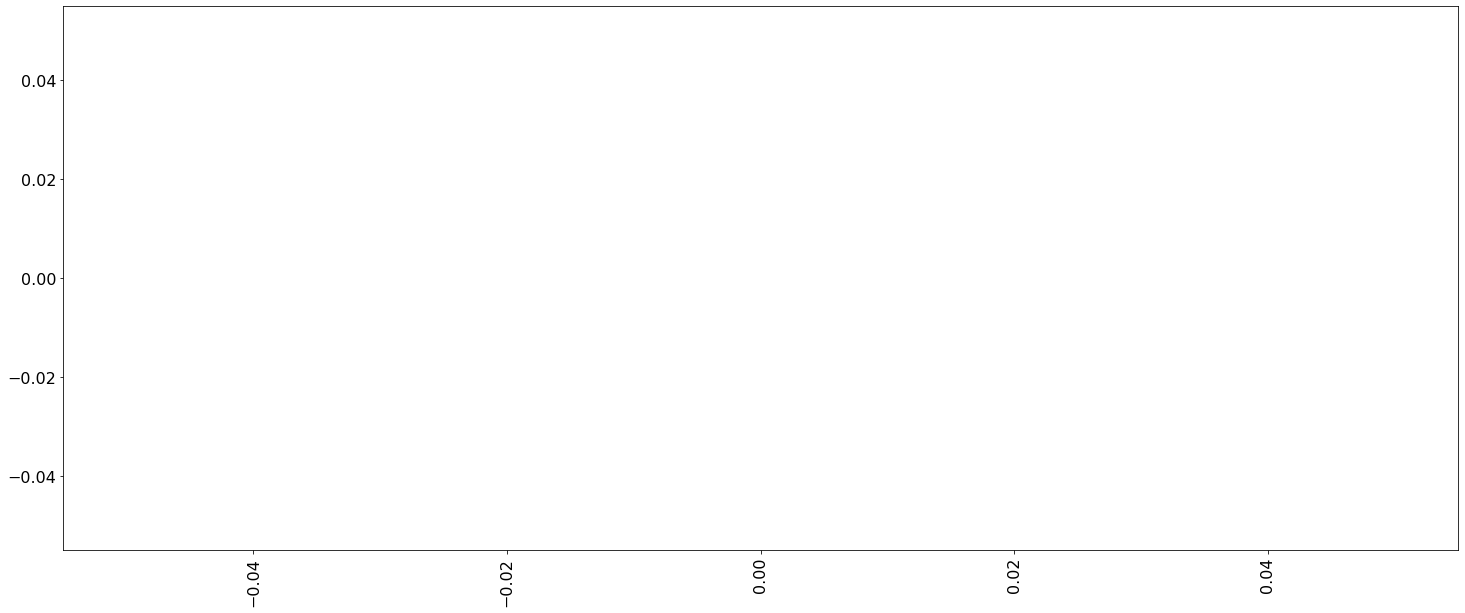

In [224]:
msno.bar(cotacoes_IBOV_filter_NA)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


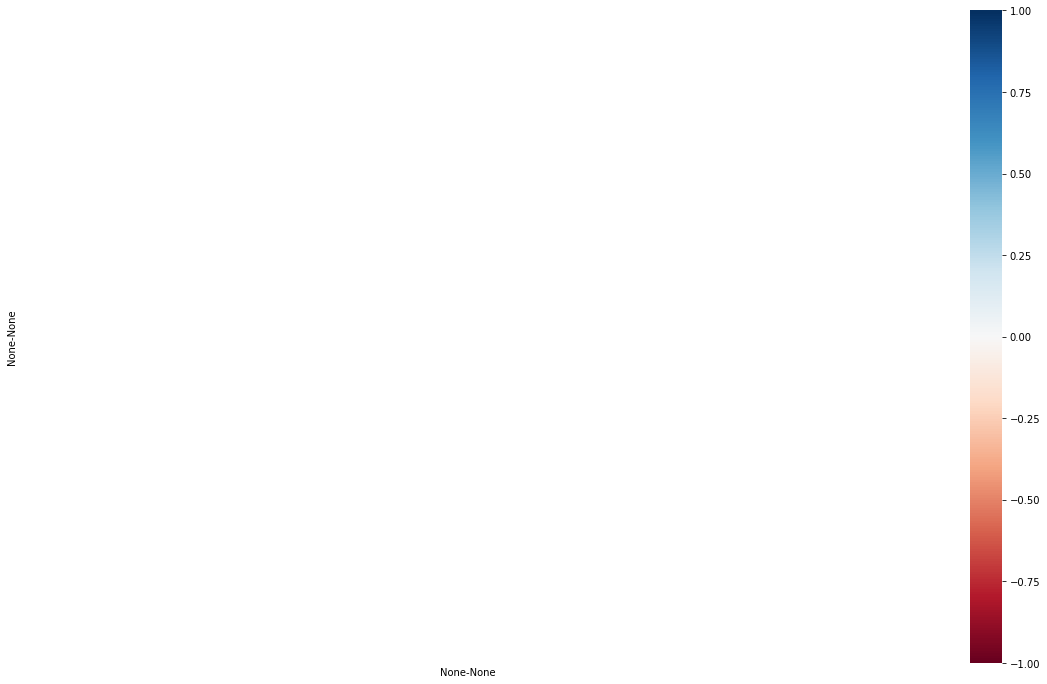

In [225]:
msno.heatmap(cotacoes_IBOV_filter_NA)

In [226]:
dados=pd.read_csv('Bovespa.csv')
dados.head()

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
0,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
1,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
2,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
3,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
4,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140
